# 导入文件

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


# 数据展示

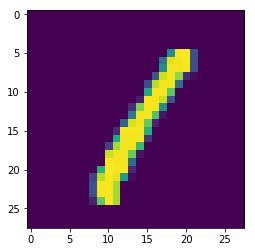

In [4]:
img=mnist.train.images[3]
plt.imshow(img.reshape((28,28)))

# 网络结构

In [6]:
inputs_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='targets')

### Encoder
conv1 = tf.layers.conv2d(inputs_, 16, (3,3), padding='same', activation=tf.nn.relu)
# Now 28x28x16
maxpool1 = tf.layers.max_pooling2d(conv1, (2,2), (2,2), padding='same')
# Now 14x14x16
conv2 = tf.layers.conv2d(maxpool1, 8, (3,3), padding='same', activation=tf.nn.relu)
# Now 14x14x8
maxpool2 = tf.layers.max_pooling2d(conv2, (2,2), (2,2), padding='same')
# Now 7x7x8
conv3 = tf.layers.conv2d(maxpool2, 8, (3,3), padding='same', activation=tf.nn.relu)
# Now 7x7x8
encoded = tf.layers.max_pooling2d(conv3, (2,2), (2,2), padding='same')
# Now 4x4x8

### Decoder
upsample1 = tf.image.resize_nearest_neighbor(encoded, (7,7))
# Now 7x7x8
conv4 = tf.layers.conv2d(upsample1, 8, (3,3), padding='same', activation=tf.nn.relu)
# Now 7x7x8
upsample2 = tf.image.resize_nearest_neighbor(conv4, (14,14))
# Now 14x14x8
conv5 = tf.layers.conv2d(upsample2, 8, (3,3), padding='same', activation=tf.nn.relu)
# Now 14x14x8
upsample3 = tf.image.resize_nearest_neighbor(conv5, (28,28))
# Now 28x28x8
conv6 = tf.layers.conv2d(upsample3, 16, (3,3), padding='same', activation=tf.nn.relu)
# Now 28x28x16

logits = tf.layers.conv2d(conv6, 1, (3,3), padding='same', activation=None)
#Now 28x28x1

decoded = tf.nn.sigmoid(logits, name='decoded')



In [7]:
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

In [8]:
sess=tf.Session()

In [ ]:
epochs=10
batch_size=64
sess.run(tf.global_variables_initializer())

for epo in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch=mnist.train.next_batch(batch_size)
        imgs=batch[0].reshape((-1,28,28,1))
        feed={inputs_:imgs,targets_:imgs}
        batch_cost,_=sess.run([cost,opt],
                              feed_dict=feed
                             )
        print("Epoch: {}/{}...".format(epo+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))
        

# 结果展示

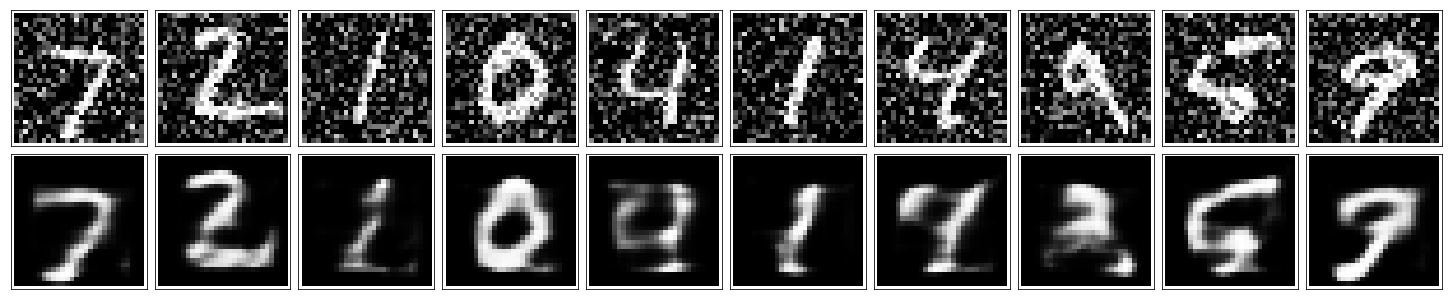

In [28]:
noise_factor=0.3

fig,axes=plt.subplots(ncols=10,nrows=2,sharex=True,sharey=True,figsize=(20,4))
in_imgs=mnist.test.images[:10]
noisy_imgs = in_imgs + noise_factor * np.random.randn(*in_imgs.shape)
noisy_imgs=np.clip(noisy_imgs,a_max=1,a_min=0)

reconstructed=sess.run(decoded,feed_dict={inputs_:noisy_imgs.reshape(10,28,28,1)})

for images, row in zip([noisy_imgs,reconstructed], axes):
    for img,ax in zip(images,row):
        ax.imshow(img.reshape((28,28)),cmap='Greys_r')
        
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
fig.tight_layout(pad=0.1)    